In [1]:
# SKRYPT PREZENTUJE POJEMNOŚĆ PAMIĘCIOWĄ SIECI Z USTALANIEM WAG PRZY UŻYCIU ALGORYTMU GRAMA-SCHMIDTA
import numpy as np
import math
import matplotlib
from matplotlib import pyplot as plt
import copy
import random
import chaotic_network as cn
get_ipython().magic('matplotlib inline')
fig_size = [12, 9]
plt.rcParams["figure.figsize"] = fig_size

In [2]:
N = 100

In [7]:
pmin = 2
pmax=15
ps = np.arange(pmin,pmax+1,1)
it = 2500
trans = 2000
it2 = 50
prob = np.zeros(np.size(ps))

In [8]:
for z in range(it2):
    ii=0
    for p in ps:
        ###generowanie losowych wzorcow###
        pat = np.random.randint(0,2,(p,N))
        pat = pat*2-1
        L, L_nor = cn.gram_schmidt(pat) #tworzenie tablicy wektorow ortonormalnych
        w = cn.hebb(L_nor) #generowanie wag z wektorow ortonormalnych
        x_0 = np.random.rand(1,N)
        eta_0 = np.zeros((1,N))
        zeta_0 = np.zeros((1,N))
        x = x_0
        eta = eta_0
        zeta = zeta_0
        index = 0
        a = 6.4+pat[index,:]
        mu = np.zeros((p,it))
        for i in range(it):
            out = cn.network_step(x, eta, zeta, w, a)
            x = out[0]
            eta = out[1]
            zeta = out[2]
            mu[:,i] = cn.overlap(x,pat,N)
        meanmu = np.mean(mu[:,trans:],1)
        if np.argmax(meanmu) == index:
            if np.size(np.unique(meanmu)) != np.size(np.unique(np.delete(meanmu,index))):
                prob[ii] = prob[ii]+1
        ii = ii+1
prob=prob/it2

(0.94000000000000006, 1.02)

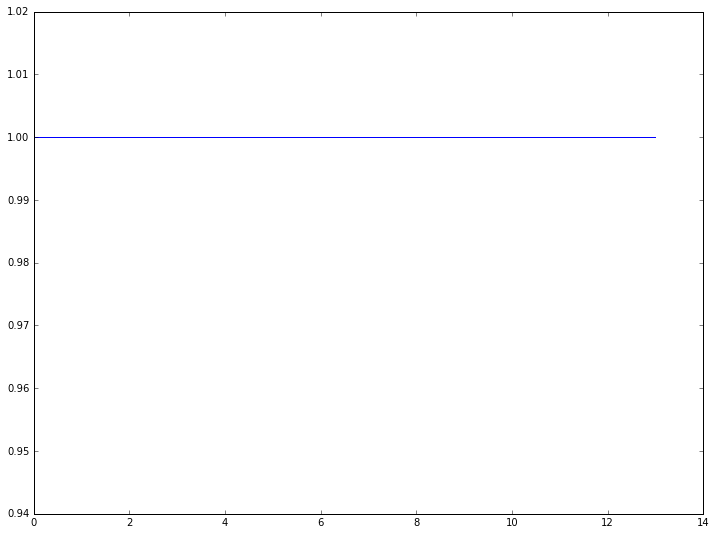

In [10]:
plt.plot(ps,prob)
plt.ylim(ymax=1.02)